In [1]:
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from sklearn import metrics
import pandas as pd
from matplotlib.pyplot import savefig
from sklearn.metrics import roc_auc_score

In [78]:
def plot_roc_curve(data_fn):
    plot_title = data_fn.replace('.data','').replace('with','+').replace('kunwok_rspk_exp/','').replace('english_rspk_exp/','').replace('Speech ','')
    x = pd.read_pickle(data_fn)
    y = np.array((len(x['match_dtw'])*[1])+(len(x['nomatch_dtw'])*[0]))
    match_score = map(lambda x: 1-x, x['match_dtw'])
    nomatch_score = map(lambda x: 1-x, x['nomatch_dtw'])
    scores = np.array(list(match_score)+list(nomatch_score))
    tpr, fpr, thresholds = metrics.roc_curve(y, scores)
    auc = roc_auc_score(y, scores)
    #maxf1 = x['maxf1']
    print(plot_title)
    print('ROC-AUC: %.5f' % (auc))
    #print('Precision: %.5f' % x['precision'])
    #print('Recall: %.5f' % x['recall'])
    #print('Threshold: %.5f' % x['dtw'])
    #print('Max F1: %.5f\n' % maxf1)
    plt.plot(tpr, fpr, label=plot_title+', AUC:%.2f' % auc)
    #return (plot_title, auc, maxf1)

Different Speaker + Original
ROC-AUC: 0.55929
Different Speaker + Respeaking
ROC-AUC: 0.72720
Extracted Words + Original 
ROC-AUC: 0.86262
Same Speaker + Respeaking
ROC-AUC: 0.85448


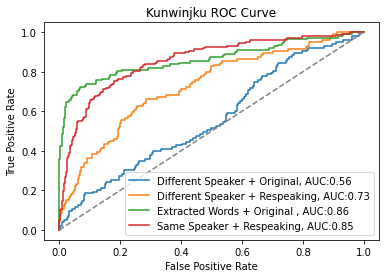

In [79]:
# title_list = []
# auc_list = []
# f1_list = []
for data_fn in sorted(glob.glob(path.join('kunwok_rspk_exp','*.data'))):
    plot_roc_curve(data_fn)
#     title_list.append(title)
#     auc_list.append(auc)
#     f1_list.append(maxf1)

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kunwinjku ROC Curve')
plt.legend()
plt.savefig('Kunwinjku_rspk_ROC.png', dpi=400)
plt.show()

# print(auc_list)
# print(f1_list)

Different Speaker + Original
ROC-AUC: 0.74635
Different Speaker + Respeaking
ROC-AUC: 0.92262
Extracted Word + Original Speech
ROC-AUC: 0.93960
Same Speaker + Respeaking
ROC-AUC: 0.98536


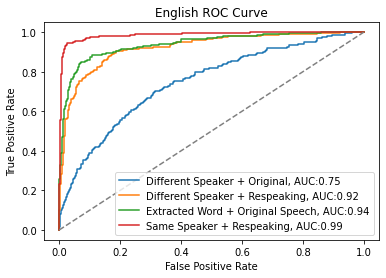

In [80]:
# title_eng = []
# auc_eng = []
# f1_eng = []
for data_fn in sorted(glob.glob(path.join('english_rspk_exp','*.data'))):
    plot_roc_curve(data_fn)
    #title_eng.append(title)
    #auc_eng.append(auc)
    #f1_eng.append(maxf1)

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('English ROC Curve')
plt.legend()
plt.savefig(data_fn+'.png', dpi=400)
plt.show()
